# Lab 12

_[General notebook information](https://computing-in-context.afeld.me/notebooks.html)_

You'll need to [install](https://computing-in-context.afeld.me/notebooks.html#installing-packages) [`lxml`](https://anaconda.org/conda-forge/lxml) and [`requests`](https://anaconda.org/conda-forge/requests).

## Scraping

Common tools:

- [Beautiful Soup package](https://realpython.com/beautiful-soup-web-scraper-python/)
- [pandas' `read_html()`](https://pandas.pydata.org/docs/user_guide/io.html#html)

Pull [Wikipedia's list of countries by area](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area#Countries_and_dependencies_by_area) into a DataFrame using `read_html()`.

In [6]:
# your code here
import pandas as pd
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area#Countries_and_dependencies_by_area',
             match='Country / dependency')
tables

[    Unnamed: 0                     Country / dependency  \
 0            –                                    Earth   
 1            1                                   Russia   
 2            –                               Antarctica   
 3            2                                   Canada   
 4      3/4 [e]                                    China   
 ..         ...                                      ...   
 259          –  Ashmore and Cartier Islands (Australia)   
 260          –            Coral Sea Islands (Australia)   
 261          –               Spratly Islands (disputed)   
 262        194                                   Monaco   
 263        195                             Vatican City   
 
             Total in km2 (mi2)         Land in km2 (mi2)  \
 0    510,072,000 (196,940,000)  148,940,000 (57,506,000)   
 1       17,098,246 (6,601,667)    16,376,870 (6,323,142)   
 2       14,200,000 (5,480,000)    14,200,000 (5,480,000)   
 3        9,984,670 (3,855,100)   

In [10]:
#the html returns a list of lists, we matched to the one table we want but we want to call it into the df as tables[0]

In [8]:
df = tables[0]
df.head()

,Unnamed: 0,Country / dependency,Total in km2 (mi2),Land in km2 (mi2),Water in km2 (mi2),% water,Unnamed: 6
0,–,Earth,"510,072,000 (196,940,000)","148,940,000 (57,506,000)","361,132,000 (139,434,000)",70.8,NaN
1,1,Russia,"17,098,246 (6,601,667)","16,376,870 (6,323,142)","721,380 (278,530)",4.2,[b]
2,–,Antarctica,"14,200,000 (5,480,000)","14,200,000 (5,480,000)",0,0.0,[c]
3,2,Canada,"9,984,670 (3,855,100)","9,093,507 (3,511,021)","891,163 (344,080)",8.9,[d]
4,3/4 [e],China,"9,596,960 (3,705,410)","9,326,410 (3,600,950)","270,550 (104,460)",2.8,[f]


## FEC data

We'll make an API call in the browser.

1. Visit https://www.fec.gov/data/candidates/
1. [Open Developer Tools](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_are_browser_developer_tools#how_to_open_the_devtools_in_your_browser).
1. Reload the page.
1. In the Network tab's request list:
   1. Filter to Fetch/XHR/AJAX (terminology will differ by browser)
   1. Right-click the API call row.
1. Click `Open in New Tab`. You will see an error.
1. In the URL bar, replace the `api_key` value with `DEMO_KEY`. The URL should therefore contain `api_key=DEMO_KEY`.

You should see a big wall of JSON data.


### Querying

Retrieve candidates who have raised funds. [API documentation.](https://api.open.fec.gov/developers/)

In [12]:
#need to use the requests documentation to pass the api key as a parameter

In [24]:
# your code here
import requests
parameters = {'api_key': 'DEMO_KEY','has_raised_funds': True}
json_data = requests.get('https://api.open.fec.gov/v1/candidates/',params=parameters).json()
json_data['results']
#json is a dictionary, this is a list of dictionaries

[{'active_through': 2022,
  'candidate_id': 'H2CO07170',
  'candidate_inactive': False,
  'candidate_status': 'P',
  'cycles': [2022, 2024],
  'district': '07',
  'district_number': 7,
  'election_districts': ['07'],
  'election_years': [2022],
  'federal_funds_flag': False,
  'first_file_date': '2021-12-27',
  'has_raised_funds': True,
  'inactive_election_years': None,
  'incumbent_challenge': 'O',
  'incumbent_challenge_full': 'Open seat',
  'last_f2_date': '2022-08-10',
  'last_file_date': '2022-08-10',
  'load_date': '2023-03-09T10:16:03',
  'name': 'AADLAND, ERIK',
  'office': 'H',
  'office_full': 'House',
  'party': 'REP',
  'party_full': 'REPUBLICAN PARTY',
  'state': 'CO'},
 {'active_through': 2022,
  'candidate_id': 'H2UT03280',
  'candidate_inactive': False,
  'candidate_status': 'C',
  'cycles': [2022],
  'district': '03',
  'district_number': 3,
  'election_districts': ['03'],
  'election_years': [2022],
  'federal_funds_flag': False,
  'first_file_date': '2020-03-24',
  

Turn those results into a DataFrame.

In [28]:
# your code here
election_df = pd.DataFrame.from_dict(json_data['results'])
election_df.head()

,active_through,candidate_id,candidate_inactive,candidate_status,cycles,district,district_number,election_districts,election_years,federal_funds_flag,...,incumbent_challenge_full,last_f2_date,last_file_date,load_date,name,office,office_full,party,party_full,state
0,2022,H2CO07170,False,P,"[2022, 2024]",07,7,[07],[2022],False,...,Open seat,2022-08-10,2022-08-10,2023-03-09T10:16:03,"AADLAND, ERIK",H,House,REP,REPUBLICAN PARTY,CO
1,2022,H2UT03280,False,C,[2022],03,3,[03],[2022],False,...,Challenger,2022-03-21,2022-03-21,2022-04-13T21:10:09,"AALDERS, TIM",H,House,REP,REPUBLICAN PARTY,UT
2,2018,S2UT00229,False,P,"[2012, 2014, 2016, 2018, 2020]",00,0,"[00, 00]","[2012, 2018]",False,...,Open seat,2018-04-23,2018-04-23,2019-03-27T16:02:41,"AALDERS, TIMOTHY NOEL",S,Senate,CON,CONSTITUTION PARTY,UT
3,2020,H0TX22260,False,C,[2020],22,22,[22],[2020],False,...,Open seat,2019-10-17,2019-10-17,2020-03-18T21:13:37,"AALOORI, BANGAR REDDY",H,House,REP,REPUBLICAN PARTY,TX
4,1978,H6PA16106,False,P,"[1976, 1978, 1980]",16,16,"[16, 16]","[1976, 1978]",False,...,None,1978-07-05,1978-07-05,2002-03-30T00:00:00,"AAMODT, NORMAN O.",H,House,REP,REPUBLICAN PARTY,PA


## Pagination

Get _all_ [NYC film permits](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p/about_data) through [the API](https://dev.socrata.com/foundry/data.cityofnewyork.us/tg4x-b46p). [Documentation on paging.](https://dev.socrata.com/docs/paging)

**Hints**

You'll probably want to create DataFrames for each page, then "concatenate" them. Here's a structure you can start with:

In [ ]:
# in a loop
#     get the first/next page of data
#     combine with the data that's already been retrieved
#     if there are fewer than the default number of records returned, stop the loop

In [30]:
!pip install sodapy

In [32]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

results = client.get("tg4x-b46p", limit=2000)

results_df = pd.DataFrame.from_records(results)

In [34]:
results_df

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,805871,Theater Load in and Load Outs,2024-08-19T00:01:00.000,2024-08-23T23:59:00.000,2024-08-16T07:57:51.000,Mayor's Office of Media & Entertainment,WEST 65 STREET between AMSTERDAM AVENUE and ...,Manhattan,7,20,Theater,Theater,United States of America,10023
1,805852,Shooting Permit,2024-08-19T06:00:00.000,2024-08-19T20:00:00.000,2024-08-15T21:11:39.000,Mayor's Office of Media & Entertainment,LAFAYETTE STREET between ASTOR PLACE and EAST ...,Manhattan,2,9,WEB,Not Applicable,United States of America,10003
2,805730,Shooting Permit,2024-08-19T07:00:00.000,2024-08-19T22:00:00.000,2024-08-15T11:43:26.000,Mayor's Office of Media & Entertainment,LEONARD STREET between BROADWAY and BENSON PLA...,Manhattan,1,"1, 5",Television,Cable-episodic,United States of America,10013
3,805606,Shooting Permit,2024-08-19T10:00:00.000,2024-08-19T16:00:00.000,2024-08-14T16:36:25.000,Mayor's Office of Media & Entertainment,SKILLMAN AVENUE between 39 STREET and 39 PLACE...,Queens,2,108,Television,Cable-episodic,United States of America,"11101, 11104"
4,805545,Theater Load in and Load Outs,2024-08-18T06:00:00.000,2024-08-19T06:00:00.000,2024-08-14T13:29:53.000,Mayor's Office of Media & Entertainment,AMSTERDAM AVENUE between WEST 73 STREET and ...,Manhattan,7,20,Theater,Theater,United States of America,10023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,777414,Shooting Permit,2024-04-22T07:00:00.000,2024-04-22T20:00:00.000,2024-04-17T11:30:27.000,Mayor's Office of Media & Entertainment,"30 PLACE between 47 AVENUE and 48 AVENUE, 30 ...",Queens,2,108,Television,Episodic series,United States of America,11101
1996,777402,Shooting Permit,2024-04-26T07:00:00.000,2024-04-26T22:00:00.000,2024-04-17T11:10:38.000,Mayor's Office of Media & Entertainment,EAST 63 STREET between 5 AVENUE and MADISON ...,Manhattan,8,19,Television,Not Applicable,United States of America,10065
1997,777401,Shooting Permit,2024-04-25T07:00:00.000,2024-04-25T21:00:00.000,2024-04-17T11:10:37.000,Mayor's Office of Media & Entertainment,EAST 63 STREET between 5 AVENUE and MADISON ...,Manhattan,8,19,Television,Not Applicable,United States of America,10065
1998,777399,Shooting Permit,2024-04-24T08:00:00.000,2024-04-24T22:30:00.000,2024-04-17T11:08:58.000,Mayor's Office of Media & Entertainment,WEST 86 STREET between BROADWAY and AMSTERDA...,Manhattan,7,"20, 24",Television,Episodic series,United States of America,10024


In [40]:
all_data = []

while len(results)<2000:
    results = client.get("tg4x-b46p", limit=2000)
    

In [50]:
all_results = []
offset=0
while True:
    client = Socrata("data.cityofnewyork.us", None)
    results = client.get("tg4x-b46p", limit=1000,offset=offset)
    offset = offset + 1000
    print(len(results),offset)
    all_results.extend(results)
    if len(results)<1000:
        break

1000 1000


1000 2000


1000 3000


1000 4000


1000 5000


1000 6000


1000 7000


1000 8000
750 9000


In [52]:
len(all_results)

8750

In [54]:
all_results

[{'eventid': '805871',
  'eventtype': 'Theater Load in and Load Outs',
  'startdatetime': '2024-08-19T00:01:00.000',
  'enddatetime': '2024-08-23T23:59:00.000',
  'enteredon': '2024-08-16T07:57:51.000',
  'eventagency': "Mayor's Office of Media & Entertainment",
  'parkingheld': 'WEST   65 STREET between AMSTERDAM AVENUE and COLUMBUS AVENUE',
  'borough': 'Manhattan',
  'communityboard_s': '7',
  'policeprecinct_s': '20',
  'category': 'Theater',
  'subcategoryname': 'Theater',
  'country': 'United States of America',
  'zipcode_s': '10023'},
 {'eventid': '805852',
  'eventtype': 'Shooting Permit',
  'startdatetime': '2024-08-19T06:00:00.000',
  'enddatetime': '2024-08-19T20:00:00.000',
  'enteredon': '2024-08-15T21:11:39.000',
  'eventagency': "Mayor's Office of Media & Entertainment",
  'parkingheld': 'LAFAYETTE STREET between ASTOR PLACE and EAST    4 STREET',
  'borough': 'Manhattan',
  'communityboard_s': '2',
  'policeprecinct_s': '9',
  'category': 'WEB',
  'subcategoryname': 'N

In [58]:
all_results_df = pd.DataFrame.from_dict(all_results)
all_results_df

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,805871,Theater Load in and Load Outs,2024-08-19T00:01:00.000,2024-08-23T23:59:00.000,2024-08-16T07:57:51.000,Mayor's Office of Media & Entertainment,WEST 65 STREET between AMSTERDAM AVENUE and ...,Manhattan,7,20,Theater,Theater,United States of America,10023
1,805852,Shooting Permit,2024-08-19T06:00:00.000,2024-08-19T20:00:00.000,2024-08-15T21:11:39.000,Mayor's Office of Media & Entertainment,LAFAYETTE STREET between ASTOR PLACE and EAST ...,Manhattan,2,9,WEB,Not Applicable,United States of America,10003
2,805730,Shooting Permit,2024-08-19T07:00:00.000,2024-08-19T22:00:00.000,2024-08-15T11:43:26.000,Mayor's Office of Media & Entertainment,LEONARD STREET between BROADWAY and BENSON PLA...,Manhattan,1,"1, 5",Television,Cable-episodic,United States of America,10013
3,805606,Shooting Permit,2024-08-19T10:00:00.000,2024-08-19T16:00:00.000,2024-08-14T16:36:25.000,Mayor's Office of Media & Entertainment,SKILLMAN AVENUE between 39 STREET and 39 PLACE...,Queens,2,108,Television,Cable-episodic,United States of America,"11101, 11104"
4,805545,Theater Load in and Load Outs,2024-08-18T06:00:00.000,2024-08-19T06:00:00.000,2024-08-14T13:29:53.000,Mayor's Office of Media & Entertainment,AMSTERDAM AVENUE between WEST 73 STREET and ...,Manhattan,7,20,Theater,Theater,United States of America,10023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,677679,Shooting Permit,2023-02-12T06:00:00.000,2023-02-12T22:00:00.000,2022-10-20T11:37:25.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
8746,677675,Shooting Permit,2023-02-11T06:00:00.000,2023-02-11T22:00:00.000,2022-10-20T11:34:37.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
8747,677670,Shooting Permit,2023-02-10T06:00:00.000,2023-02-10T22:00:00.000,2022-10-20T11:21:38.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
8748,677666,Shooting Permit,2023-02-09T06:00:00.000,2023-02-09T22:00:00.000,2022-10-20T11:17:44.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019


## GitHub

1. [Sign up.](https://github.com/signup)
    - If you have an account already, [sign in](https://github.com/login).
    - A [Free plan](https://github.com/pricing) is sufficient.
1. [Open](https://code.visualstudio.com/docs/editor/workspaces#_how-do-i-open-a-vs-code-workspace) the folder/repository from [Lecture 23](https://computing-in-context.afeld.me/lecture_23.html) in VSCode.
1. In bottom left, the [Publish](https://code.visualstudio.com/docs/sourcecontrol/overview#_git-status-bar-actions) icon (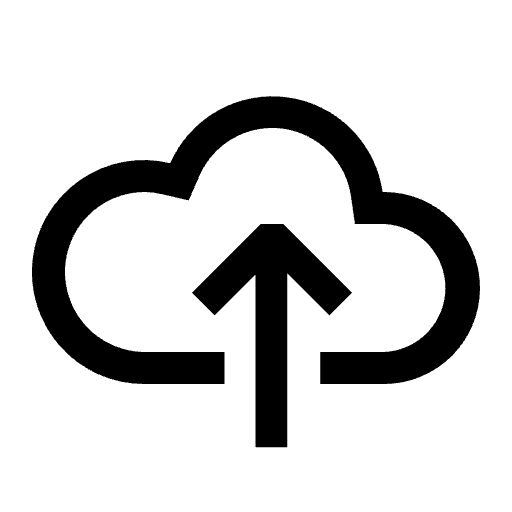). <!-- https://icon-sets.iconify.design/codicon/cloud-upload/ -->
1. [Allow signing in with GitHub](https://code.visualstudio.com/docs/sourcecontrol/github#_authenticating-with-an-existing-repository), if prompted.
1. Click `Publish to GitHub public repository`.
    1. [Public vs. private](https://docs.github.com/en/repositories/creating-and-managing-repositories/about-repositories#about-repository-visibility)
1. [Push (a.k.a. "sync")](https://code.visualstudio.com/docs/sourcecontrol/overview#_remotes) your repository.
1. Visit the repository on GitHub.
    1. Click into the files.
1. Make a change in the repository in VSCode (locally).
1. Commit the change.
1. Push the change to GitHub.

## [JupyterBook](https://jupyterbook.org/)

- Used to build the [course site](https://computing-in-context.afeld.me/)
- [Install `jupyter-book` via Anaconda](https://computing-in-context.afeld.me/notebooks.html#installing-packages)

### [Config](https://jupyterbook.org/en/stable/customize/config.html)

Create minimal `_config.yml`:

```yaml
title: NAME
author: NAME

execute:
  execute_notebooks: off
```

[More about YAML.](https://www.cloudbees.com/blog/yaml-tutorial-everything-you-need-get-started)

### [Table of contents](https://jupyterbook.org/customize/toc.html)

Create a `_toc.yml`:

```yaml
format: jb-book
root: project_3.ipynb
```

### [Build the site](https://jupyterbook.org/en/stable/start/build.html#build-your-books-html)

[Open a terminal](https://code.visualstudio.com/docs/terminal/getting-started) and run:

```sh
jupyter-book build .
```

### View the site (locally)

On Mac:

```sh
open _build/html/index.html
```

On Windows:

```powershell
"_build\html\index.html"
```

Alternatively,

- Find the file through Finder / Windows Explorer and double-click
- From your browser, go to `File`->`Open File…`

## Commit changes

1. [View the diff](https://code.visualstudio.com/docs/sourcecontrol/overview#_viewing-diffs)
1. [Ignore](https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files#configuring-ignored-files-for-a-single-repository) `_build/` files
1. Commit
1. Push

---

Submit via Gradescope.